In [1]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')

In [2]:
traf = traf.loc[traf.confidence_score >= 30 , :]
forbes= TMC.loc[TMC.road == 'FORBES AVE',:]
EST = forbes.loc[forbes.direction == 'EASTBOUND',:]

In [3]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [4]:
main = pd.merge(EST,traf,on= 'tmc', how = 'inner')

In [5]:
main

,tmc,road,direction,intersection,state,county,zip,start_latitude,start_longitude,end_latitude,...,Unnamed: 18,start,end,measurement_tstamp,speed,average_speed,reference_speed,travel_time_minutes,confidence_score,cvalue
0,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2017-01-01 05:35:00,23.00,21.0,21.0,1.67,30.0,100.0
1,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2017-01-01 05:40:00,23.00,21.0,21.0,1.67,30.0,100.0
2,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2017-01-01 05:45:00,23.00,21.0,21.0,1.67,30.0,100.0
3,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2017-01-01 05:50:00,23.00,21.0,21.0,1.67,30.0,100.0
4,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2017-01-01 07:00:00,28.00,23.0,21.0,1.37,30.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119611,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2019-06-04 11:10:00,18.39,16.0,19.0,2.09,30.0,100.0
119612,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2019-06-04 11:15:00,17.32,16.0,19.0,2.21,30.0,100.0
119613,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2019-06-04 11:20:00,18.00,16.0,19.0,2.13,30.0,100.0
119614,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,NaN,Beeler,S_Bellefield,2019-06-04 11:25:00,18.00,16.0,19.0,2.13,30.0,100.0


In [37]:
main.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
import datetime as dt
main['Date'] = pd.to_datetime(main['Date'])

In [38]:
main['Weekday'] = main['Date'].dt.dayofweek

In [39]:
 WD = main.loc[main.Weekday != 0,:]

In [40]:
WD = WD.groupby(pd.Grouper(key = 'Date',freq = '30T')).mean()

In [41]:
WD = WD.reset_index()

In [42]:
WD['hour'] = WD['Date'].dt.hour 

In [43]:
M = WD.loc[(WD.hour >= 7) & (WD.hour < 10),:]
E = WD.loc[(WD.hour >= 15) & (WD.hour <19 ),:]


In [44]:
import datetime
t1 = pd.to_datetime('3-7-2018')
t2 = pd.to_datetime('5-21-2018')
t3 = pd.to_datetime('8-14-2018')
t4 = pd.to_datetime('3-22-2019')
t5 = pd.to_datetime('04-06-2019')

In [45]:
traf1= M[M["Date"].between(t1,t2)]
traf2 =M[M["Date"].between(t2,t3)]
traf3 = M[M['Date'].between(t3,t4)]
traf4 = M[M['Date'].between(t4,t5)]
traf5=  E[E["Date"].between(t1,t2)]
traf6 = E[E["Date"].between(t2,t3)]
traf7 = E[E['Date'].between(t3,t4)]
traf8 = E[E['Date'].between(t4,t5)]

Text(0,0.5,'Count of cars')

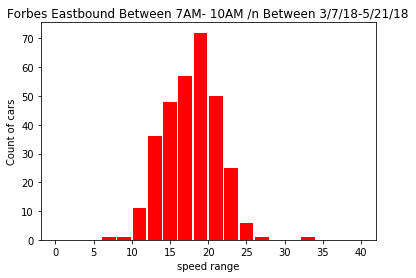

In [46]:
# for time between 7:00 AM - 9 : 00 PM
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf1['speed'].dropna().values,rwidth = .9, bins = bin , color = 'r')
plt.title('Forbes Eastbound Between 7AM- 10AM /n Between 3/7/18-5/21/18')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

In [47]:
M['speed'].mean()

17.97629211944517

Text(0,0.5,'Count of cars')

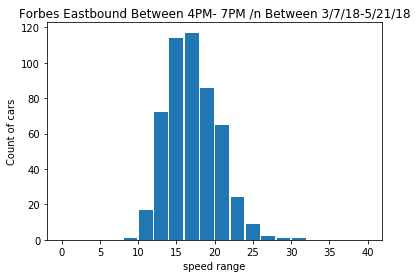

In [48]:
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf5['speed'].dropna().values,rwidth = .9, bins = bin )
plt.title('Forbes Eastbound Between 4PM- 7PM /n Between 3/7/18-5/21/18')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

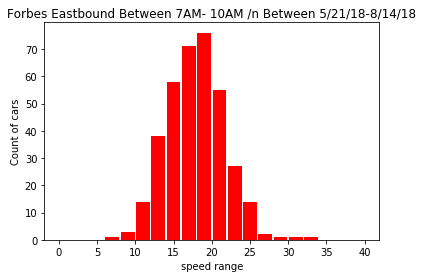

In [49]:
# for time between 7:00 AM - 9 : 00 PM
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf2['speed'].dropna().values,rwidth = .9, bins = bin , color = 'r')
plt.title('Forbes Eastbound Between 7AM- 10AM /n Between 5/21/18-8/14/18')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

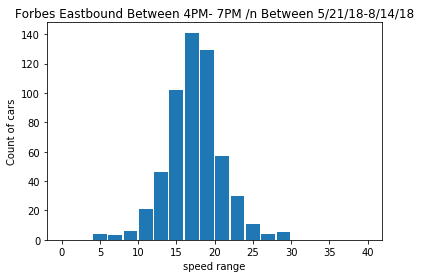

In [50]:
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf6['speed'].dropna().values,rwidth = .9, bins = bin )
plt.title('Forbes Eastbound Between 4PM- 7PM /n Between 5/21/18-8/14/18')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

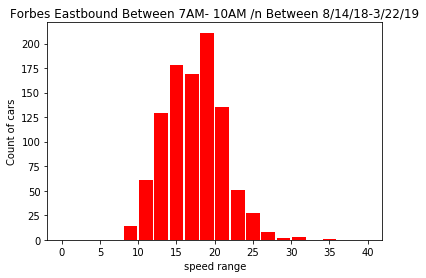

In [51]:
# for time between 7:00 AM - 9 : 00 PM
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf3['speed'].dropna().values,rwidth = .9, bins = bin , color = 'r')
plt.title('Forbes Eastbound Between 7AM- 10AM /n Between 8/14/18-3/22/19')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

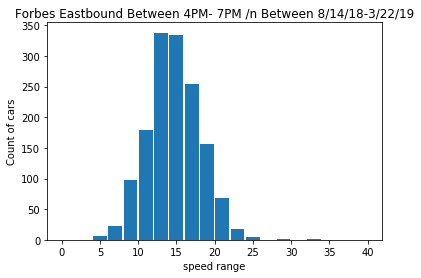

In [52]:
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf7['speed'].dropna().values,rwidth = .9, bins = bin )
plt.title('Forbes Eastbound Between 4PM- 7PM /n Between 8/14/18-3/22/19')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

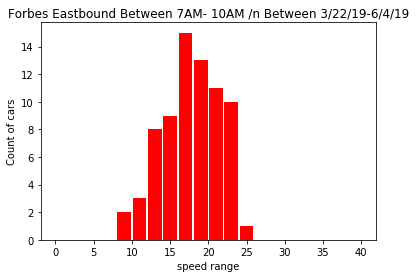

In [53]:
# for time between 7:00 AM - 9 : 00 PM
import matplotlib.pyplot as plt
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf4['speed'].dropna().values,rwidth = .9, bins = bin , color = 'r')
plt.title('Forbes Eastbound Between 7AM- 10AM /n Between 3/22/19-6/4/19')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

Text(0,0.5,'Count of cars')

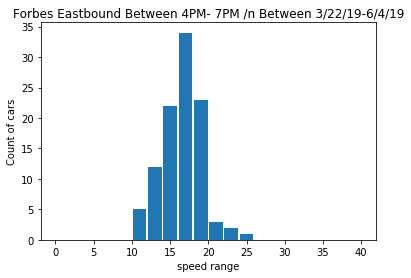

In [54]:
%matplotlib inline
bin = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.hist(traf8['speed'].dropna().values,rwidth = .9, bins = bin )
plt.title('Forbes Eastbound Between 4PM- 7PM /n Between 3/22/19-6/4/19')
plt.xlabel('speed range')
plt.ylabel('Count of cars')

In [55]:
traf5['speed'].mean()

17.111174197773405

In [56]:
traf6['speed'].mean()

17.354181872391166

In [57]:
traf7['speed'].mean()

14.651522297297307

In [58]:
traf8['speed'].mean()

16.601155228758174